# Course 3 (Introduction to Machine Learning) - Final Project
# Sumukha R

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset
df = pd.read_csv("nyc_taxi_trip_duration Dataset.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])

# id column dropped
df.drop(columns=["id"], axis=1, inplace=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
df.shape, df.isna().sum()

((729322, 10),
 vendor_id             0
 pickup_datetime       0
 dropoff_datetime      0
 passenger_count       0
 pickup_longitude      0
 pickup_latitude       0
 dropoff_longitude     0
 dropoff_latitude      0
 store_and_fwd_flag    0
 trip_duration         0
 dtype: int64)

# Evaluation Metric 

Evalution metrics used:
1. RMSE (Root Mean Squared Error)         
    It is the most commonly used metric and it is the root of average of squared values of errors. It is used as it doesnt change the unit (MSE changes the unit) - lower the better.
2. RMSLE (Root Mean Squared Log Error)      
    RMSE takes only the differnece and the results can be too high and log helps to scale the error - lower the better.       
We will be using both these metrics.              

# Benchmark Model 

In [4]:
# Shuffling the dataset and creating 75-25 train and test sets
from sklearn.utils import shuffle

df = shuffle(df, random_state=108)

divisions = int(df.shape[0]/4)

train = df.iloc[:3*divisions]
test = df.iloc[3*divisions+1:]

In [5]:
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
623830,2,2016-02-14 16:39:58,2016-02-14 17:11:03,1,-73.997177,40.714081,-73.982689,40.772160,N,1865
159710,2,2016-06-09 16:14:02,2016-06-09 16:21:31,1,-73.988197,40.759499,-73.976608,40.755100,N,449
306239,1,2016-01-13 18:14:39,2016-01-13 18:21:35,1,-74.005585,40.727985,-73.991356,40.727524,N,416
637477,1,2016-04-22 21:40:31,2016-04-22 22:09:14,2,-73.972900,40.754410,-74.031296,40.622852,N,1723
536391,1,2016-06-23 15:49:39,2016-06-23 16:04:51,2,-73.986664,40.725780,-73.983803,40.746696,N,912


In [6]:
test.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
229774,1,2016-03-29 10:20:24,2016-03-29 10:38:30,1,-73.971100,40.795906,-73.986801,40.762661,N,1086
538582,1,2016-05-09 17:43:25,2016-05-09 18:36:25,1,-73.987930,40.722870,-73.973297,40.786739,N,3180
517570,2,2016-02-04 19:28:30,2016-02-04 19:35:54,2,-73.999413,40.743919,-74.000557,40.737301,N,444
473873,2,2016-06-16 13:02:49,2016-06-16 13:22:24,1,-73.985718,40.760178,-73.990074,40.738300,N,1175
526640,2,2016-06-21 18:17:36,2016-06-21 18:41:07,1,-73.996635,40.720444,-73.990807,40.750900,N,1411


In [7]:
train.shape, test.shape

((546990, 10), (182331, 10))

In [8]:
train["mean"] = train["trip_duration"].mean()
test["mean"] = test["trip_duration"].mean()

In [9]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE

# Error for benchmark model
benchmark_train_error = MSE(train["trip_duration"], train["mean"], squared=False)
benchmark_train_log_error = np.sqrt(MSLE(train["trip_duration"], train["mean"]))
benchmark_test_error = MSE(test["trip_duration"], test["mean"], squared=False)
benchmark_test_log_error = np.sqrt(MSLE(test["trip_duration"], test["mean"]))

print(f"Train error:\nRMSE: {benchmark_train_error}, RMSLE: {benchmark_train_log_error}\n\
Test error:\nRMSE: {benchmark_test_error}, RMSLE: {benchmark_test_log_error}")

Train error:
RMSE: 4097.034941027663, RMSLE: 0.8872230793161465
Test error:
RMSE: 3063.354278746115, RMSLE: 0.8842244102740604


    RMSE and RMSLE for train and test is very high (this was expected as it a benchmark model).           
------

### We will be removing pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude and store_and_fwd_flag variables as these variables DO NOT provide any extra info and will lead to model failure.
##### (Got this result while performing linear regression - these coefficients were very close to zero)

In [10]:
# Drop columns

df.drop(columns=["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude", "store_and_fwd_flag"],
        axis=1, inplace=True)
df = df.reset_index(drop=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration
0,2,2016-02-14 16:39:58,2016-02-14 17:11:03,1,1865
1,2,2016-06-09 16:14:02,2016-06-09 16:21:31,1,449
2,1,2016-01-13 18:14:39,2016-01-13 18:21:35,1,416
3,1,2016-04-22 21:40:31,2016-04-22 22:09:14,2,1723
4,1,2016-06-23 15:49:39,2016-06-23 16:04:51,2,912


In [11]:
# Extracting datetime columns
df["day_of_month"] = df["pickup_datetime"].dt.day
df["week_of_month"] = df["pickup_datetime"].dt.week
df["week_of_day"] = df["pickup_datetime"].dt.weekday
df["hour_of_day"] = df["pickup_datetime"].dt.hour
df["month_of_year"] = df["pickup_datetime"].dt.month

# Dropping datetime columns
df.drop(columns=["pickup_datetime", "dropoff_datetime"], axis=1, inplace=True)
df.head()

,vendor_id,passenger_count,trip_duration,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year
0,2,1,1865,14,6,6,16,2
1,2,1,449,9,23,3,16,6
2,1,1,416,13,2,2,18,1
3,1,2,1723,22,16,4,21,4
4,1,2,912,23,25,3,15,6


In [12]:
# Target and independent variables
x = df.drop(["trip_duration"], axis=1)
y = df["trip_duration"]

In [13]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)
x.head()

,vendor_id,passenger_count,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year
0,1.0,0.111111,0.433333,0.096154,1.000000,0.695652,0.2
1,1.0,0.111111,0.266667,0.423077,0.500000,0.695652,1.0
2,0.0,0.111111,0.400000,0.019231,0.333333,0.782609,0.0
3,0.0,0.222222,0.700000,0.288462,0.666667,0.913043,0.6
4,0.0,0.222222,0.733333,0.461538,0.500000,0.652174,1.0


In [14]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=108, test_size=0.25)

# K-Nearest Neighbours (KNN) Model 

In [15]:
# Creating knn model
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()

# Fit the model
knn.fit(x_train, y_train)

# Predict results
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_error = MSE(y_pred_train, y_train, squared=False)
knn_test_error = MSE(y_pred_test, y_test, squared=False)
knn_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
knn_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {knn_train_error}, RMSLE: {knn_train_log_error}\n\
Test error:\nRMSE: {knn_test_error}, RMSLE: {knn_test_log_error}")

Train error:
RMSE: 4231.628652734553, RMSLE: 0.8812417023003435
Test error:
RMSE: 3239.0266121658997, RMSLE: 0.9149025641866524


In [16]:
# Elbow curve
test_error = []
test_log_error = []
def elbow(k, x_train, y_train, x_test, y_test):
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

k = range(6, 20)
for i in k:
    elbow(i, x_train, y_train, x_test, y_test)

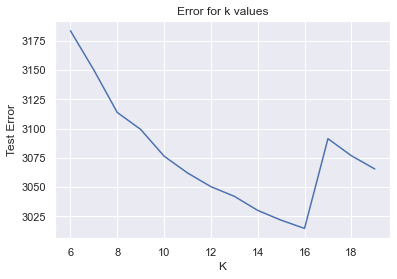

In [17]:
# Plotting the elbow curve for test error
plt.plot(k, test_error)
plt.xlabel("K")
plt.ylabel("Test Error")
plt.title("Error for k values")
plt.show()

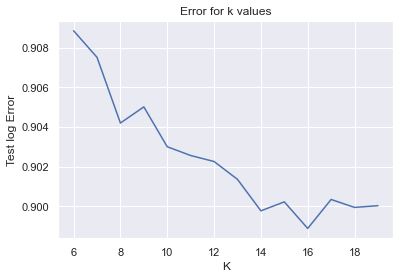

In [18]:
# Plotting the elbow curve for test log error
plt.plot(k, test_log_error)
plt.xlabel("K")
plt.ylabel("Test log Error")
plt.title("Error for k values")
plt.show()

    The best value of k is 16 

In [42]:
# Model with best k value
knn = KNN(n_neighbors=16)

# Fit the model
knn.fit(x_train, y_train)

# Predict results
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_error = MSE(y_pred_train, y_train, squared=False)
knn_test_error = MSE(y_pred_test, y_test, squared=False)
knn_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
knn_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {knn_train_error}, RMSLE: {knn_train_log_error}\n\
Test error:\nRMSE: {knn_test_error}, RMSLE: {knn_test_log_error}")

Train error:
RMSE: 4110.175570916592, RMSLE: 0.8720730664728744
Test error:
RMSE: 3014.7266254568053, RMSLE: 0.8988917344334924


# Linear Model 

In [19]:
# Importing linear regression
from sklearn.linear_model import LinearRegression as LR

# Fit the model
lr = LR(normalize=True)
lr.fit(x_train, y_train)

# Predict results
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

lr_train_error = MSE(y_pred_train, y_train, squared=False)
lr_test_error = MSE(y_pred_test, y_test, squared=False)
lr_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
lr_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {lr_train_error}, RMSLE: {lr_train_log_error}\n\
Test error:\nRMSE: {lr_test_error}, RMSLE: {lr_test_log_error}")

Train error:
RMSE: 4132.449735602656, RMSLE: 0.8907588917537186
Test error:
RMSE: 2907.942180005412, RMSLE: 0.8884590262761781


In [20]:
lr.coef_

array([212.34268813, 143.52989632,  11.15337988,  29.36088946,
       -21.6233794 ,  36.53098368, 108.0557209 ])

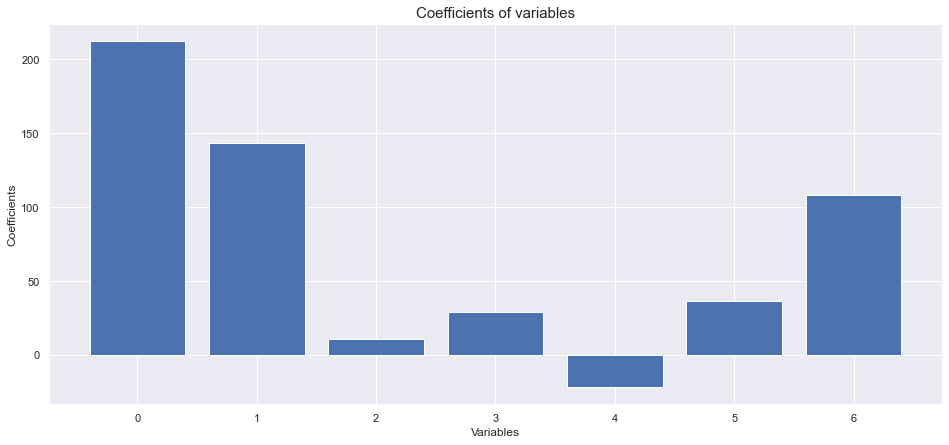

In [21]:
# Plotting the coefficients
plt.figure(figsize=(16, 7))
plt.bar(range(len(x_train.columns)), lr.coef_)
plt.xlabel("Variables", size=12)
plt.title("Coefficients of variables", size=15)
plt.ylabel("Coefficients", size=12)
plt.show()

    From the above plot, it is clear that the data is dependent mostly on 3 variables which have high coefficients, moderately dependent on 3 variable which have average coefficients and it is very less dependent on one variable whose coefficient is very low.

# Regularization - Lasso 

In [22]:
# Using Lasso regression as there are less number of significant parameters
from sklearn.linear_model import Lasso
alpha = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_error, test_error, train_log_error, test_log_error = [], [], [], []
# Custom function to obtain error values
def lasso(alpha, x_train, y_train, x_test, y_test):
    LLR = Lasso(alpha=alpha, normalize=True)
    # Fit the model
    LLR.fit(x_train, y_train)
    y_pred_train = LLR.predict(x_train)
    y_pred_test = LLR.predict(x_test)
    # Get errors
    train_error.append(MSE(y_pred_train, y_train, squared=False))
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    train_log_error.append(np.sqrt(MSLE(y_pred_train, y_train)))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

for i in alpha:
    lasso(i, x_train, y_train, x_test, y_test)

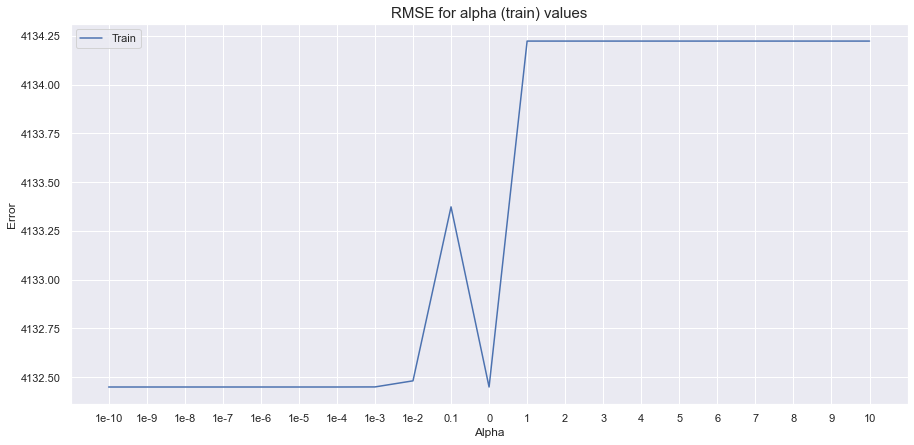

In [23]:
# Plotting the errors
alpha_val = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "0.1",
             "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.figure(figsize=(15, 7))
sns.lineplot(alpha_val, train_error)
plt.title("RMSE for alpha (train) values", size=15)
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend(["Train"])
plt.show()

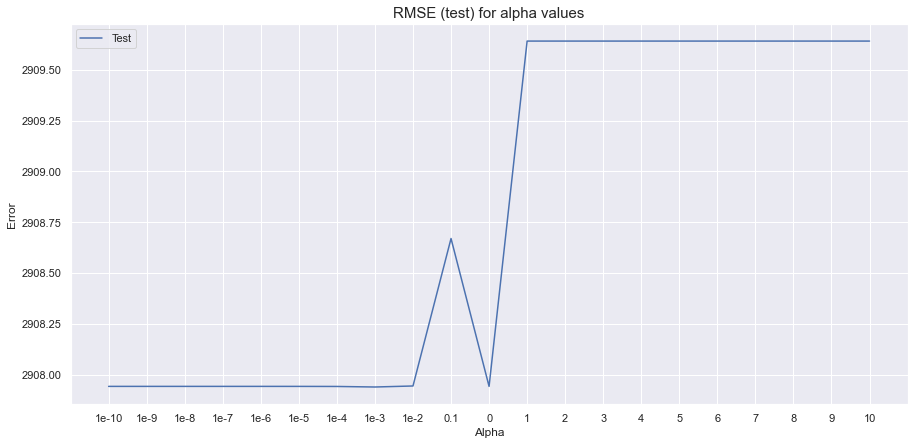

In [24]:
plt.figure(figsize=(15, 7))
sns.lineplot(alpha_val, test_error)
plt.title("RMSE (test) for alpha values", size=15)
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend(["Test"])
plt.show()

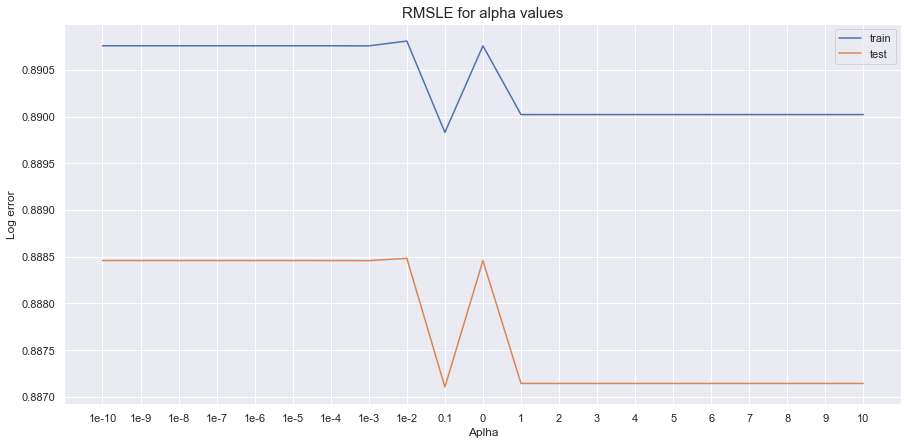

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(alpha_val, train_log_error)
plt.plot(alpha_val, test_log_error)
plt.legend(["train", "test"])
plt.ylabel("Log error")
plt.title("RMSLE for alpha values", size=15)
plt.xlabel("Aplha")
plt.show()

From the above plots,  
- Both RMSE and RMSLE are high - test error has decreased as compared to previous models.          
- It is seen that the model performs well on the test data compared to train data when using RMSE.             
- It can also be seen that there is not much of difference between train and test error when using RMSLE.             
- The model performs the best when alpha value is 0.1

In [26]:
# Lasso Regression model when alpha is 0.1
LLR = Lasso(alpha=0.1, normalize=True)
# Fit the model
LLR.fit(x_train, y_train)

# Predict results
y_pred_train = LLR.predict(x_train)
y_pred_test = LLR.predict(x_test)

llr_train_error = MSE(y_pred_train, y_train, squared=False)
llr_test_error = MSE(y_pred_test, y_test, squared=False)
llr_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
llr_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {lr_train_error}, RMSLE: {lr_train_log_error}\n\
Test error:\nRMSE: {lr_test_error}, RMSLE: {lr_test_log_error}")

Train error:
RMSE: 4132.449735602656, RMSLE: 0.8907588917537186
Test error:
RMSE: 2907.942180005412, RMSLE: 0.8884590262761781


# Decision Tree Model 

In [27]:
# Importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Fit the model
DTR = DecisionTreeRegressor(random_state=108)
DTR.fit(x_train, y_train)

# Predict results
y_pred_train = DTR.predict(x_train)
y_pred_test = DTR.predict(x_test)

dtr_train_error = MSE(y_pred_train, y_train, squared=False)
dtr_test_error = MSE(y_pred_test, y_test, squared=False)
dtr_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
dtr_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {dtr_train_error}, RMSLE: {dtr_train_log_error}\n\
Test error:\nRMSE: {dtr_test_error}, RMSLE: {dtr_test_log_error}")

Train error:
RMSE: 3965.4960642274727, RMSLE: 0.8477312709559943
Test error:
RMSE: 3183.685731385717, RMSLE: 0.9034191502759887


#### Obatining best max depth 

In [28]:
train_error, test_error, train_log_error, test_log_error = [], [], [], []
# Custom loop to obtain best max depth
for i in range(5, 20):
    # Fit the model
    DTR = DecisionTreeRegressor(max_depth=i, random_state=108)
    DTR.fit(x_train, y_train)
    
    # Predict results
    y_pred_train = DTR.predict(x_train)
    y_pred_test = DTR.predict(x_test)
    
    # Get errors
    train_error.append(MSE(y_pred_train, y_train, squared=False))
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    train_log_error.append(np.sqrt(MSLE(y_pred_train, y_train)))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

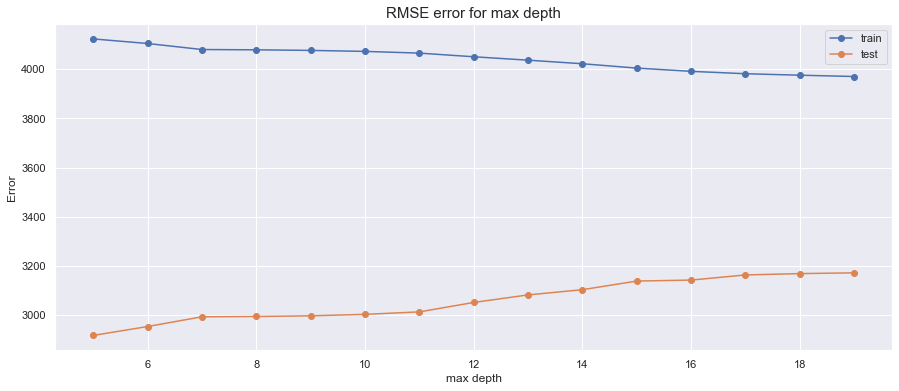

In [29]:
# Plotting RMSE error vs max depth
plt.figure(figsize=(15, 6))
plt.plot(range(5, 20), train_error, marker='o')
plt.plot(range(5, 20), test_error, marker='o')
plt.xlabel("max depth")
plt.ylabel("Error")
plt.title("RMSE error for max depth", size=15)
plt.legend(["train", "test"])
plt.show()

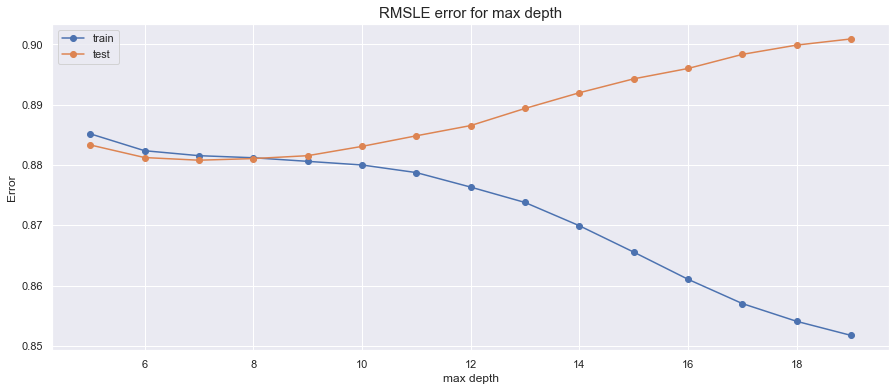

In [30]:
# Plotting RMSLE error vs max depth
plt.figure(figsize=(15, 6))
plt.plot(range(5, 20), train_log_error, marker='o')
plt.plot(range(5, 20), test_log_error, marker='o')
plt.xlabel("max depth")
plt.ylabel("Error")
plt.title("RMSLE error for max depth", size=15)
plt.legend(["train", "test"])
plt.show()

#### Obatining best max leaf nodes 

In [31]:
train_error, test_error, train_log_error, test_log_error = [], [], [], []
# Custom loop to obtain best max leaf nodes
for i in range(5, 50):
    # Fit the model
    DTR = DecisionTreeRegressor(max_depth=8, max_leaf_nodes=i, random_state=108)
    DTR.fit(x_train, y_train)
    
    # Predict results
    y_pred_train = DTR.predict(x_train)
    y_pred_test = DTR.predict(x_test)
    
    # Get errors
    train_error.append(MSE(y_pred_train, y_train, squared=False))
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    train_log_error.append(np.sqrt(MSLE(y_pred_train, y_train)))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

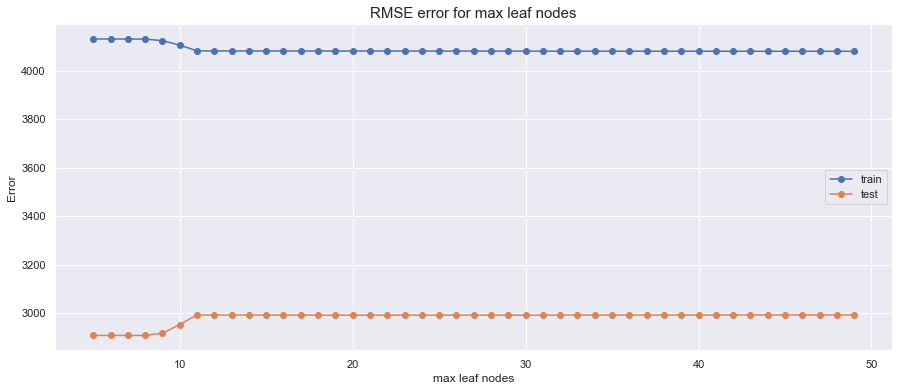

In [32]:
# Plotting RMSE error vs max leaf nodes
plt.figure(figsize=(15, 6))
plt.plot(range(5, 50), train_error, marker='o')
plt.plot(range(5, 50), test_error, marker='o')
plt.xlabel("max leaf nodes")
plt.ylabel("Error")
plt.title("RMSE error for max leaf nodes", size=15)
plt.legend(["train", "test"])
plt.show()

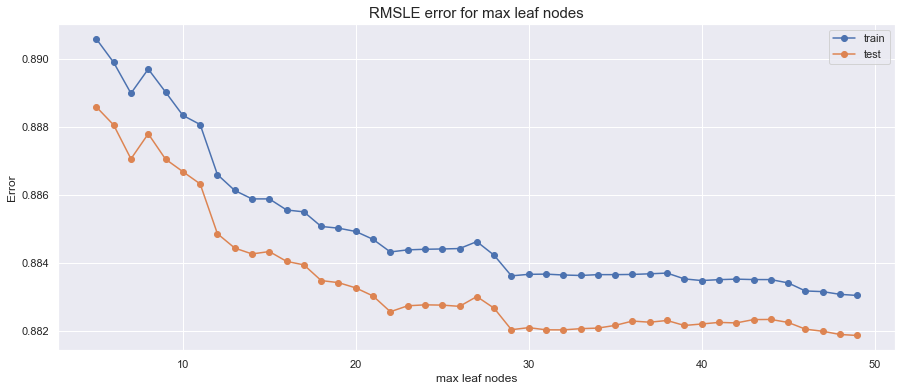

In [33]:
# Plotting RMSLE error vs max leaf nodes
plt.figure(figsize=(15, 6))
plt.plot(range(5, 50), train_log_error, marker='o')
plt.plot(range(5, 50), test_log_error, marker='o')
plt.xlabel("max leaf nodes")
plt.ylabel("Error")
plt.title("RMSLE error for max leaf nodes", size=15)
plt.legend(["train", "test"])
plt.show()

#### Obatining best min samples leaf  

In [34]:
train_error, test_error, train_log_error, test_log_error = [], [], [], []
# Custom loop to obtain best min samples leaf
for i in range(5, 50):
    # Fit the model
    DTR = DecisionTreeRegressor(max_depth=8, max_leaf_nodes=34, min_samples_leaf=i, random_state=108)
    DTR.fit(x_train, y_train)
    
    # Predict results
    y_pred_train = DTR.predict(x_train)
    y_pred_test = DTR.predict(x_test)
    
    # Get errors
    train_error.append(MSE(y_pred_train, y_train, squared=False))
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    train_log_error.append(np.sqrt(MSLE(y_pred_train, y_train)))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

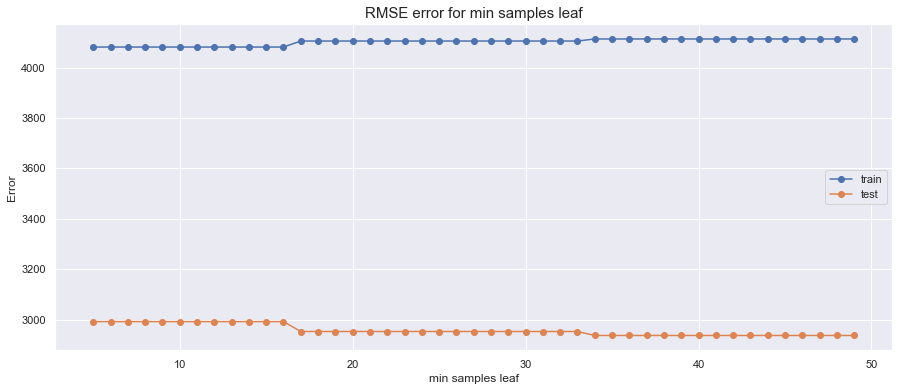

In [35]:
# Plotting RMSE error vs min samples leaf
plt.figure(figsize=(15, 6))
plt.plot(range(5, 50), train_error, marker='o')
plt.plot(range(5, 50), test_error, marker='o')
plt.xlabel("min samples leaf")
plt.ylabel("Error")
plt.title("RMSE error for min samples leaf", size=15)
plt.legend(["train", "test"])
plt.show()

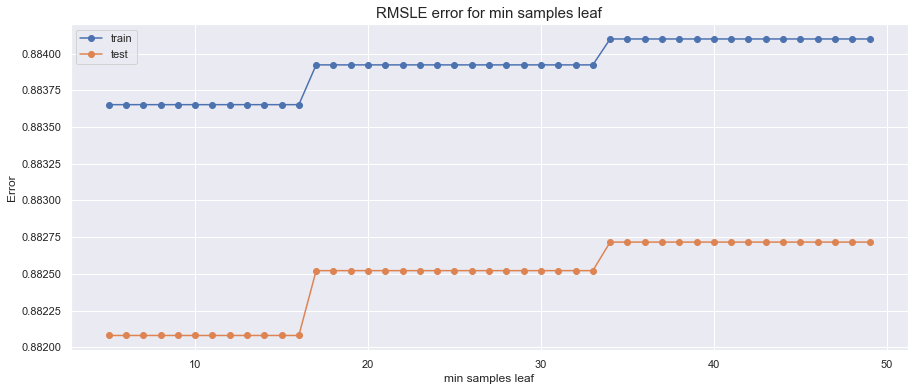

In [36]:
# Plotting RMSLE error vs min samples leaf
plt.figure(figsize=(15, 6))
plt.plot(range(5, 50), train_log_error, marker='o')
plt.plot(range(5, 50), test_log_error, marker='o')
plt.xlabel("min samples leaf")
plt.ylabel("Error")
plt.title("RMSLE error for min samples leaf", size=15)
plt.legend(["train", "test"])
plt.show()

    Max depth = 8
    Max leaf nodes = 34
    Min samples leaf = 16

In [37]:
# Importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Fit the model
DTR = DecisionTreeRegressor(max_depth=8, max_leaf_nodes=34, min_samples_leaf=16, random_state=108)
DTR.fit(x_train, y_train)

# Predict results
y_pred_train = DTR.predict(x_train)
y_pred_test = DTR.predict(x_test)

dtr_train_error = MSE(y_pred_train, y_train, squared=False)
dtr_test_error = MSE(y_pred_test, y_test, squared=False)
dtr_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
dtr_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {dtr_train_error}, RMSLE: {dtr_train_log_error}\n\
Test error:\nRMSE: {dtr_test_error}, RMSLE: {dtr_test_log_error}")

Train error:
RMSE: 4081.776114413361, RMSLE: 0.8836525896770443
Test error:
RMSE: 2992.1434854775334, RMSLE: 0.8820798522512894


In [38]:
from sklearn import tree
decision_tree = tree.export_graphviz(DTR, out_file='tree.dot', feature_names=x_train.columns, max_depth=4, filled=True)

In [39]:
!dot -Tpng tree.dot -o tree.png

'!dot -Tpng tree.dot -o tree.png'

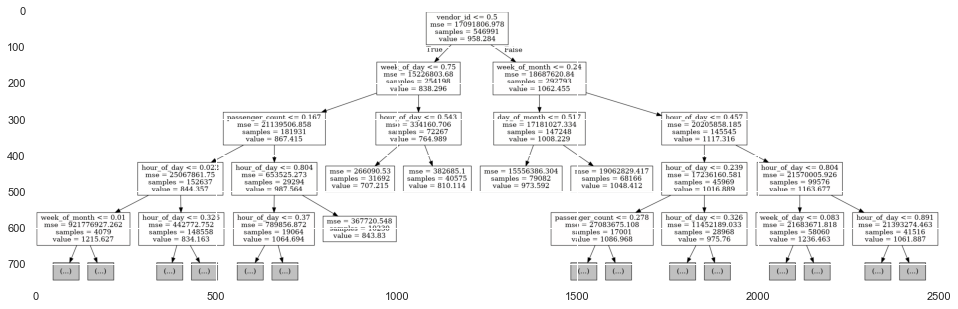

In [40]:
image = plt.imread('tree.png')
plt.figure(figsize=(18,5))
plt.imshow(image)
plt.show()

From the above image, it shows that the first split is done on vendor id follwed by week of day on one side and week of month on one side. Hence, the most important 3 variables are vendor id, week of day and week of month.

# Barplot 

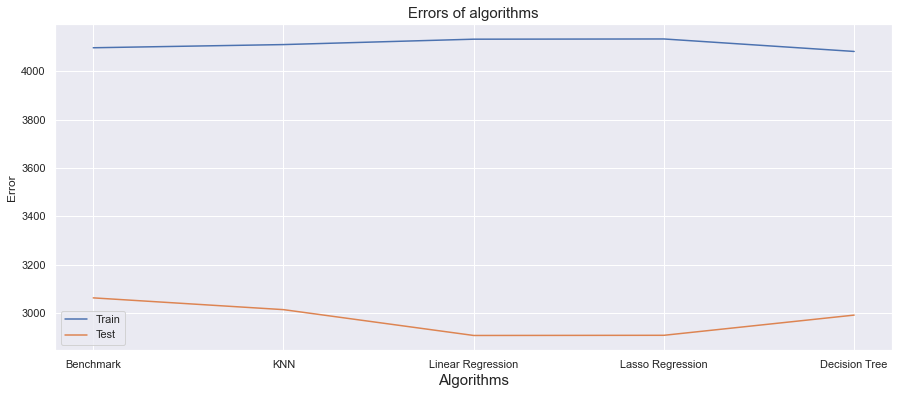

In [43]:
# Barplot of train and test errors of all algorithms
algos = ["Benchmark", "KNN", "Linear Regression", "Lasso Regression", "Decision Tree"]
algo_train_error = [benchmark_train_error, knn_train_error, lr_train_error, llr_train_error, dtr_train_error]
algo_test_error = [benchmark_test_error, knn_test_error, lr_test_error, llr_test_error, dtr_test_error]
plt.figure(figsize=(15, 6))
plt.plot(algos, algo_train_error)
plt.plot(algos, algo_test_error)
plt.xlabel("Algorithms", size=15)
plt.ylabel("Error")
plt.title("Errors of algorithms", size=15)
plt.legend(["Train", "Test"])
plt.show()

From the above plot,
- KNN model and Decision Tree have performed equally same with average error.
- The best algorithm is lasso regression with lowest train and test error.